In [ ]:
"""This module is meant to track the average temperatures of Jan through years 1960-2024 """

In [1]:
from DataCollection_current import Temperature_Data
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
### Set up my Class
data = pd.read_excel("cleandata.xlsx", sheet_name=None)
tp = Temperature_Data(data)
years = tp.years

In [3]:
highs = []
avgs = []
lows = []
x = []
for year in years:
    high = np.mean(tp.collect_month(7,year,0))
    highs.append(high)
    
    avg = np.mean(tp.collect_month(7,year,1))
    avgs.append(avg)
    
    low = np.mean(tp.collect_month(7,year,2))
    lows.append(low)
    
    x.append(int(year))

highs = np.array(highs)
highs = highs[::-1]
avgs = np.array(avgs)
avgs = avgs[::-1]
lows = np.array(lows)
lows = lows[::-1]
x = x[::-1]


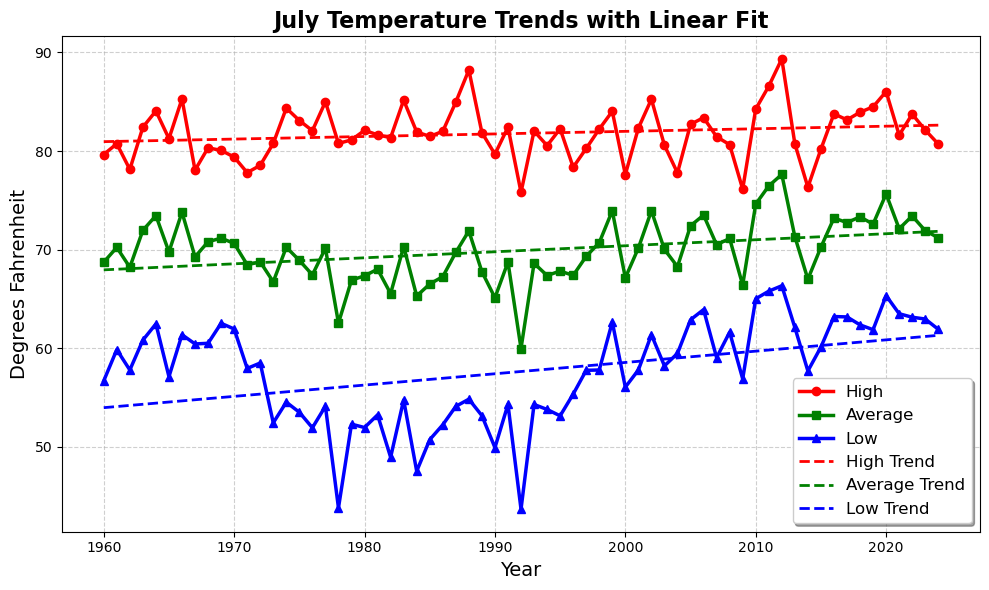

In [4]:
import numpy as np
import matplotlib.pyplot as plt

# Fit linear trends (degree 1 = straight line)
high_fit = np.polyfit(x, highs, 1)
avg_fit  = np.polyfit(x, avgs, 1)
low_fit  = np.polyfit(x, lows, 1)

# Create fitted y-values
high_trend = np.polyval(high_fit, x)
avg_trend  = np.polyval(avg_fit, x)
low_trend  = np.polyval(low_fit, x)

# Plot everything
plt.figure(figsize=(10, 6))

# Original data
plt.plot(x, highs, color='red', linewidth=2.5, marker='o', label='High')
plt.plot(x, avgs,  color='green', linewidth=2.5, marker='s', label='Average')
plt.plot(x, lows,  color='blue', linewidth=2.5, marker='^', label='Low')

# Trend lines
plt.plot(x, high_trend, 'r--', linewidth=2, label='High Trend')
plt.plot(x, avg_trend,  'g--', linewidth=2, label='Average Trend')
plt.plot(x, low_trend,  'b--', linewidth=2, label='Low Trend')

# Labels and formatting
plt.title("July Temperature Trends with Linear Fit", fontsize=16, weight='bold')
plt.xlabel("Year", fontsize=14)
plt.ylabel("Degrees Fahrenheit", fontsize=14)
plt.legend(fontsize=12, frameon=True, shadow=True, loc='best')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


In [5]:
high_slope_per_decade = high_fit[0]*10
avg_slope_per_decade = avg_fit[0]*10
low_slope_per_decade = low_fit[0]*10
print("The average high has increased",high_slope_per_decade,"per decade.")
print("The average temperature has increased",avg_slope_per_decade,"per decade.")
print("The average low has increased",low_slope_per_decade,"per decade.")

The average high has increased 0.261335438754795 per decade.
The average temperature has increased 0.6109900180464688 per decade.
The average low has increased 1.147121024137153 per decade.
